In [ ]:
# Itinializing the Jopyter Notebook file WeatherPy.ipynb

In [156]:
# Importing relevant modules 
import requests
import json
from config import api_key

In [157]:
# Importing PrettyPrint module for a more readable JSON formatting
from pprint import pprint

In [158]:
# Import citypy 
from citipy import citipy

In [159]:
city=citipy.nearest_city(-10.0,20.21)
city.city_name

'saurimo'

In [215]:
# Initialize empty lists & city counter
city_names=[]
lat=[]
lon=[]
city_count=0

temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]

# Setup base url for OpenWeatherMap API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"




# Import numpy random for generating random range of latitude and longitude numbers  
from numpy import random

# set up while loop that will run until 500 valid city names are generated
while city_count<200 :        
        #vlatitude values trange from -90 to 90 
        rand_lat= -180 + 360 * random.random(1)[0]
    
        # longitude ranges from -180 to 180  
        rand_lon= -90 + 180 * random.random(1)[0]
        
        rand_city=citipy.nearest_city(rand_lat, rand_lon)
        
        if rand_city.city_name not in city_names:
            
            # Build query url based on teh name of the current selected city  
            query_url = base_url + "appid=" + api_key + "&q=" + rand_city.city_name

            # Pull data from API and convert to json format  
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            try :
                # Pull specific itemized data as requested as appedn to corresponding list
                temp_F = round(( weather_json['main']['temp'] - 273.15 ) * 9 / 5 + 32, 2)
                temperature.append(temp_F)
            
                humidity_pct = weather_json['main']['humidity']
                humidity.append(humidity_pct)
           
                cloudiness_pct = weather_json['clouds']['all']
                cloudiness.append(cloudiness_pct)
           
                wind = weather_json['wind']['speed']
                wind_speed.append(wind)
                
                lat.append(rand_lat)
                lon.append(rand_lon)
                city_names.append(rand_city.city_name)
                
                city_count+=1 
                print(city_count)
                
            except (ValueError, KeyError):
                print(f"------------------------------ City missing data:{rand_city.city_name}")
#                 temperature.append(np.nan)
#                 humidity.append(np.nan)
#                 cloudiness.append(np.nan)
#                 wind_speed.append(np.nan)
            
            
#             print("len city_names=" + str(len(city_names)) + "|" + str(city_count) + " | " +rand_city.city_name +" | "+ str(temp_F) +" | "+ str(humidity_pct))

            
           
        else :
            ">>>>>    City already sampled"


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
------------------------------ City missing data:belushya guba
------------------------------ City missing data:barentsburg
20
21
22
23
24
------------------------------ City missing data:barentsburg
25
26
27
28
29
30
31
32
33
------------------------------ City missing data:barentsburg
------------------------------ City missing data:illoqqortoormiut
34
35
36
37
38
39
------------------------------ City missing data:ambodifototra
40
41
42
43
------------------------------ City missing data:illoqqortoormiut
------------------------------ City missing data:taolanaro
44
45
46
47
48
49
50
51
------------------------------ City missing data:illoqqortoormiut
------------------------------ City missing data:amderma
52
53
54
55
56
57
58
59
60
61
62
------------------------------ City missing data:belushya guba
------------------------------ City missing data:illoqqortoormiut
63
------------------------------ City missing data:belushya guba
64
65

Text(0.5, 1.0, 'Location of 1000 sampled cities (in lon&lat coordinates)')

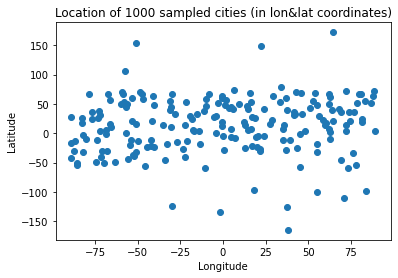

In [216]:
# Import matplotlib and plot sampled points to check visually for good coverage/diversity 
import matplotlib.pyplot as plt

plt.scatter(lon, lat)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Location of 1000 sampled cities (in lon&lat coordinates)")

In [219]:
city_data['City name'].unique()

array(['chardara', 'luderitz', 'port alfred', 'svetlyy', 'saint-philippe',
       'ushuaia', 'longyearbyen', 'puerto ayacucho', 'beboto',
       'walvis bay', 'tasiilaq', 'ponta do sol', 'macae', 'grand baie',
       'bredasdorp', 'codrington', 'kidal', 'hermanus', 'east london',
       'sept-iles', 'narsaq', 'ponta delgada', 'qaanaaq', 'albany',
       'klyuchi', 'qasigiannguit', 'dikson', 'punta arenas', 'baft',
       'hit', 'souillac', 'busselton', 'stornoway', 'la rioja',
       'grindavik', 'kudahuvadhoo', 'mar del plata', 'aswan',
       'vila velha', 'belmonte', 'stephenville', 'adrar', 'mattru',
       'arraial do cabo', 'bilma', 'kismayo', 'port elizabeth',
       'atlantic city', 'rocha', 'keti bandar', 'taoudenni', 'waddan',
       'vestmannaeyjar', 'los llanos de aridane', 'castro', 'upernavik',
       'umm kaddadah', 'maragogi', 'awjilah', 'saint-augustin', 'praia',
       'bambous virieux', 'ancud', 'torbay', 'jamestown', 'mahibadhoo',
       'sao filipe', 'ebbw vale', '

In [238]:
# Create dictionary of city names and associated lat, lon coordinates
import pandas as pd

len(city_names),len(lat),len(lon),len(temperature), len(humidity),len(wind_speed), len(cloudiness)
city_dict={
    "City name": city_names,
    'Longitude': lon,
    'Latitude': lat,
    'Temperature, F': temperature,
    'Humidity, %': humidity,
    'Cloudiness, %': cloudiness,
    'Wind speed, mph': wind_speed
}

city_data=pd.DataFrame(city_dict)
city_data=city_data.sort_values(by=['City name'])
city_data['City name'].nunique()
city_data['Hemisphere']=""

for index, row in city_data.iterrows():
        print(row['Latitude'])
        if row['Latitude']>=0 :
            print("lat>0")
            row['Hemisphere']="Northern"
        else :
            row['Hemisphere']="Southern"


29.365415200671947
lat>0
43.57476099896323
lat>0
-97.97284238561357
-12.249543710059527
-25.150887684805554
-41.422080246117815
-12.606362893327514
-23.491606405365246
24.973197211300715
lat>0
-40.994775335629924
21.96498218608508
lat>0
37.420316603746016
lat>0
26.762842589027628
lat>0
28.91629510455786
lat>0
-34.46686828561295
3.0753000046804573
lat>0
17.284162989764326
lat>0
16.2511549522726
lat>0
4.869553192376259
lat>0
8.049088999305411
lat>0
-17.868821550425594
24.16125204729775
lat>0
19.455575937446838
lat>0
3.2324579332791927
lat>0
64.20542603445574
lat>0
-96.5870041961441
56.041318985733966
lat>0
-109.52356471739097
33.668495575796186
lat>0
-20.648976632378464
-59.63813265962814
46.049501110362286
lat>0
-50.714207642955245
41.317801936413815
lat>0
-10.20318173782178
40.99210679502593
lat>0
-45.615474661851295
26.236457181494757
lat>0
20.85996183274665
lat>0
-48.85049466575225
38.463068432052154
lat>0
-49.65724581577163
-22.665989724654764
14.939302737254366
lat>0
172.2600303426

In [236]:
city_data

,City name,Longitude,Latitude,"Temperature, F","Humidity, %","Cloudiness, %","Wind speed, mph",Hemisphere
41,adrar,-3.965847,29.365415,97.57,12,100,6.63,
122,aktau,51.219664,43.574761,70.38,82,38,9.29,
23,albany,84.131119,-97.972842,76.10,56,98,1.34,
134,alta floresta,-54.365570,-12.249544,89.42,58,40,3.09,
195,ampanihy,43.756487,-25.150888,65.03,68,21,1.66,
...,...,...,...,...,...,...,...,...
9,walvis bay,13.207918,-25.082642,63.55,77,0,4.64,
88,xai-xai,36.903610,-28.498579,63.28,78,7,3.42,
170,yar-sale,72.020366,71.290042,37.63,50,100,3.34,
169,yevsino,83.423338,54.386494,63.00,90,9,2.70,


In [97]:
# Setup base url for OpenWeatherMap API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Building query URL
query_url = base_url + "appid=" + api_key + "&q=" + city_data['City name'][0]
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=0cb0504e124c591594132d882d112599&q=port alfred'

In [98]:
# Retriev weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Review the data API pulled
pprint(weather_json)

# Below fisrt work on setting up and troubleshooting calls to pull temperature in K 
# and convert to F, humidity (%), cloudiness (%) and wind speed (mph)

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': -33.5906, 'lon': 26.891},
 'dt': 1621961820,
 'id': 964432,
 'main': {'feels_like': 291.8,
          'grnd_level': 1016,
          'humidity': 83,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 291.72,
          'temp_max': 291.72,
          'temp_min': 291.72},
 'name': 'Port Alfred',
 'sys': {'country': 'ZA', 'sunrise': 1621919048, 'sunset': 1621955697},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 235, 'gust': 4.71, 'speed': 3.77}}


In [99]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [100]:
weather_json['main'].keys()

dict_keys(['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'sea_level', 'grnd_level'])

In [101]:
weather_json['main']['temp']

291.72

In [108]:
temp_F= ( weather_json['main']['temp'] - 273.15 ) * 9 / 5 + 32
round(temp_F,2)

65.43

In [110]:
humidity_pct = weather_json['main']['humidity']
humidity_pct

83

In [112]:
cloudiness_pct = weather_json['clouds']['all']

96

In [113]:
wind_speed = weather_json['wind']['speed']
wind_speed

3.77